# Feature Scaling in Machine Learning

## Why Feature Scaling Matters

Feature scaling is essential in machine learning because:
- Different features often have different units and ranges (e.g., age: 0-100, income: 0-1,000,000)
- Many algorithms are sensitive to the magnitude of input features
- Unscaled features can lead to:
  - Slower convergence in gradient-based algorithms
  - Biased importance in distance-based algorithms
  - Numerical instability in deep learning models

^[Use cases: Linear Regression, Neural Networks, K-Nearest Neighbors, Support Vector Machines]

## Scaling Methods Compared

### 1. Min-Max Scaling (Normalization)

Maps values to a fixed range [0,1]. Best when:
- You need a bounded range
- Data is not normally distributed
- You have outliers you want to preserve

$$X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$

**Example:**
Scaling student grades (0-100) to percentages:
- Raw grade: 85
- Min grade: 0
- Max grade: 100

$$\text{Normalized grade} = \frac{85 - 0}{100 - 0} = 0.85$$

#### When to Use? 
- Image processing (pixel values 0-255 → 0-1)
- Neural networks with sigmoid activation functions
- When you need bounded values

### 2. Standardization (Z-score)

Centers data around mean=0 with standard deviation=1. Best when:
- Data approximately follows normal distribution
- Outliers should be dampened
- Algorithm assumes normally distributed input

$$X_{\text{std}} = \frac{X - \mu}{\sigma}$$

**Example:**
Standardizing heights in a class:
- Height: 180cm
- Mean height: 170cm
- Standard deviation: 10cm

$$\text{Standardized height} = \frac{180 - 170}{10} = 1.0$$

This means 180cm is 1 standard deviation above mean.

#### When to Use? 
- Linear regression
- Logistic regression
- Neural networks
- When data follows normal distribution


### 3. Mean Normalization

Centers data around 0 while considering the range. Best when:
- You want centered data but need to preserve scale relative to range
- Values should be roughly between -1 and 1

$$X_{\text{norm}} = \frac{X - \mu}{X_{\text{max}} - X_{\text{min}}}$$

#### When to Use? 
- When you want values centered around zero
- When working with features that have different scales but similar ranges


## Implementation Tips

1. Always fit scaling parameters on training data only
2. Apply same scaling to validation/test sets using training parameters
3. Handle outliers before scaling if using min-max scaling
4. Store scaling parameters for later use in production


## When to Use Each Method

| Method | Best For | Watch Out For |
|--------|----------|---------------|
| Min-Max | Neural Networks, algorithms requiring bounded input | Sensitive to outliers |
| Standardization | Linear models, SVMs, neural networks | May not preserve zero values |
| Mean Normalization | When centered data is needed but range matters | Similar limitations to min-max |

## Common Pitfalls to Avoid ⚠️
- Scaling target variables unnecessarily
- Scaling categorical variables
- Forgetting to scale test data with training data parameters
- Scaling after splitting data into training/test sets

In [2]:
import numpy as np

# Sample data: House prices features
data = {
    'rooms': [2, 4, 6, 8],
    'square_feet': [1000, 2000, 3000, 4000],
    'year_built': [1990, 2000, 2010, 2020]
}

X = np.array(list(data.values())).T
print(X)

[[   2 1000 1990]
 [   4 2000 2000]
 [   6 3000 2010]
 [   8 4000 2020]]


In [3]:
# Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
for i, feature in enumerate(data.keys()):
    print(f'{feature}: {X_scaled[:, i]}')

rooms: [0.         0.33333333 0.66666667 1.        ]
square_feet: [0.         0.33333333 0.66666667 1.        ]
year_built: [0.         0.33333333 0.66666667 1.        ]


In [4]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
for i, feature in enumerate(data.keys()):
    print(f'{feature}: {X_scaled[:, i]}')

rooms: [-1.34164079 -0.4472136   0.4472136   1.34164079]
square_feet: [-1.34164079 -0.4472136   0.4472136   1.34164079]
year_built: [-1.34164079 -0.4472136   0.4472136   1.34164079]


In [5]:
# Mean Normalization
def mean_normalize(X):
    return (X - np.mean(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))


X_mean_normalized = mean_normalize(X)
X_mean_normalized

array([[-0.5       , -0.5       , -0.5       ],
       [-0.16666667, -0.16666667, -0.16666667],
       [ 0.16666667,  0.16666667,  0.16666667],
       [ 0.5       ,  0.5       ,  0.5       ]])

Text(0.5, 1.0, 'Standardized Ages')

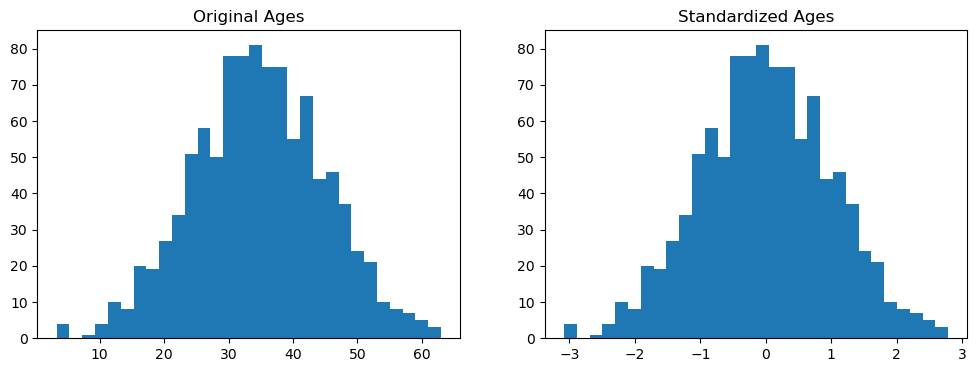

In [10]:
import matplotlib.pyplot as plt

# Generate sample ages
ages = np.random.normal(35, 10, 1000)  # mean=35, std=10
standardized_ages = (ages - np.mean(ages)) / np.std(ages)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.hist(ages, bins=30)
ax1.set_title("Original Ages")
ax2.hist(standardized_ages, bins=30)
ax2.set_title("Standardized Ages")